[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0046207215101459025, 0.0254933376442201, 0.06389181976460256, 0.12023808886866309, 0.1945485324438791, 0.28642444043732657, 0.3950631494130719, 0.5192895367041459, 0.6576057605155684, 0.8082556101144519, 0.969298708162682, 1.1386892

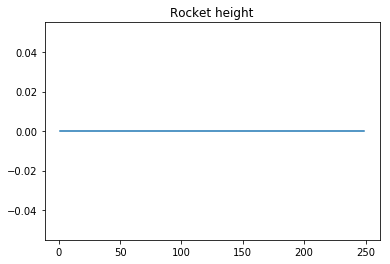

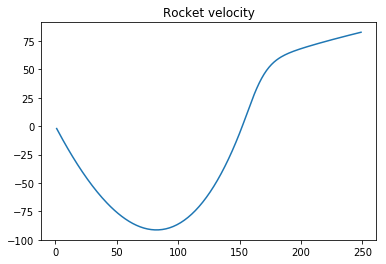

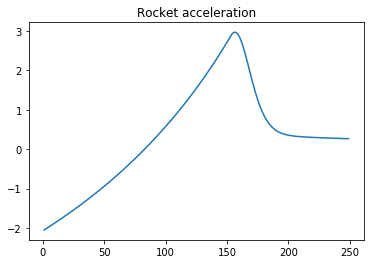

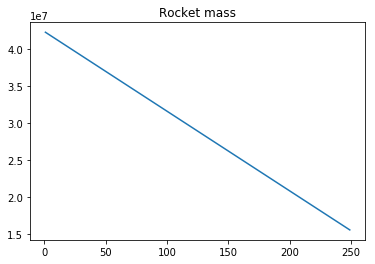

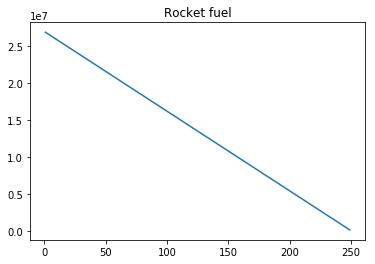

In [59]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
number_of_engines = 200
fuel_burned_per_second = 40
max_fuel = 10000 * number_of_engines
m_empty = 14164000 + 467.2 * number_of_engines

def m(t):
    return m_empty + m_fuel(t)

def m_fuel(t):
    return max(max_fuel - (t * fuel_burned_per_second) * number_of_engines, 0)

#v = v0 + u*ln(m0/m) - gt
isp = 310
g = -9.8

#G =
#m_earth =

"""
def g(t):
    return (G * m_earth) / altitude(t-1)
"""




Veq = isp * g
def du(t):
    if m_fuel(t) > 0: 
        return (((-Veq * fuel_burned_per_second) * number_of_engines) / m(t)) + g
    else: 
        return g #- drag
    
#print(du(1))
#print(du(2))  
#print(du(3))  
#print(du(4))  
#print(du(5))  
#print(du(6))  
#print(du(7))  
#print(temp(altitude(0)))
import scipy.integrate as integrate

def vel(t):
    if (t <= 0):
        return 0
    else:
        return integrate.quad(lambda x: du(x), 0, t)[0]

def altitude(t):
    if (t <= 0):
        return 0
    else:
        return integrate.quad(lambda x: vel(x), 0, t)[0]


#print(altitude(2))

def temp(altitude):
    if (altitude < 11000):
        temp = 15.04 - 0.00649 * altitude
        #temp = 50
    elif (11000 <= altitude < 25000):
        temp = -56.45
    #    temp = 30
    elif (25000 <= altitude < 50000):
        temp = 18.27 - 0.00299 * altitude
    #    temp = 10
    else:
        temp = -250
    #temp = 20
    return temp

def pressure(altitude):
    if (altitude < 11000):
        temp = 15.04 - 0.00649 * altitude
        pressure1 = 101.29 * ((temp + 273.1) / 288.08)**5.256
    elif (11000 <= altitude < 25000):
        temp = -56.46
        pressure1 = 22.65 * math.e ** (1.73 - (0.000157 * altitude))
    elif (25000 <= altitude < 50000):
        temp = 18.29 - 0.00299 * altitude
        pressure1 = 2.488 * ((temp + 273.1) / 216.6)**-11.388
    else:
        temp = -100
        pressure1 = 0
    #pressure = 1
    return pressure1


def rho(pressure1, temp1):
    if pressure1 == -1:
        return 0
    #print("temperature " + str(temp))
    #print("pressure " + str(pressure))
    return pressure1 / (0.2869 * (temp1 + 273.1))

from decimal import *
def drag(alt, vel):
    Cd = 1.28
    A = 283820
    if (alt < 50000 and vel > 0):
    #getcontext().prec = 6
        #print("rho" + str(rho(temp(alt), pressure(alt))))
        #print("vel^2" + str(vel**2))
        #print("altitude" + str(alt))
        #if (vel > 2000000):
        #    print("DANGERRRRRRRR")
        drag = 0.5 * rho(temp(alt), pressure(alt)) * vel**2 * Cd * A
        
        
        if (drag > 0):
            return drag
        else:
            return 0
    else:
        return 0




time_list = []
fuel_list = []
mass_list = []
accel_list = []
velocity_list = []
pos_list = []
rho_list = []
drag_list = []
drag_acc = [0.]




for time in range(1, 250):
    time_list.append(time)
    fuel_list.append(m_fuel(time))
    mass_list.append(m(time))
    accel_list.append(du(time) - drag_acc[time - 1])
    velocity_list.append(sum(accel_list))
    pos_list.append(max(sum(velocity_list), 0))
    rho_list.append(rho(pressure(pos_list[time - 1]), temp(pos_list[time - 1])))
    drag_list.append(drag(pos_list[time - 1], velocity_list[time - 1]))
    drag_acc.append(drag_list[time - 1] / mass_list[time - 1])
    #print(drag(pos_list[time - 1], velocity_list[time - 1]))
    #if (pos_list[time] > 50000):
    #    print("SAFELY OUT OF EARTH'S ATMOSPHERE")
    #    break

print(drag_acc)
#print(rho_list)
#print(velocity_list)
"""    
time_range = [t for t in range(500)]
print("finished time range")
fuel_range = [max(a, 0) for a in range(10000, -40000, -100)]
print("finished fuel range")
mass_range = [m(time) for time in time_range]
print("finished mass range")
acceleration_range = [du(time) for time in time_range]
print("finished accel range")
velocity_range = [sum(acceleration_range[:n]) for n in range(len(acceleration_range))]
print("finished velocity range")
position_range = [sum(velocity_range[:n]) for n in range(len(velocity_range))]
print("finished position_range")
rho_range = [rho(pressure(alt), temp(alt)) for alt in position_range]
print("finished rho range")
"""
#Cd = 1.28
#A = 283280
#p = rho
#v = v**2

#print(position_range[440])
#Fd = 0.5 * p * v**2 * Cd * A
#altitude -> temperature -> pressure -> rho

#print(len(time_range))
#print(len(position_range))
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.title("Rocket height"); 
plt.plot(time_list, pos_list)
plt.figure()
plt.title("Rocket velocity"); 
plt.plot(time_list, velocity_list)
plt.figure()
plt.title("Rocket acceleration"); 
plt.plot(time_list, accel_list)
plt.figure()
plt.title("Rocket mass"); 
plt.plot(time_list, mass_list)
plt.figure()
plt.title("Rocket fuel"); 
plt.plot(time_list, fuel_list)

#def v(t):
#    if t == 0:
#        return 0
#    else:
#        v = u * math.log(m + max_fuel / m)
#        return v + v(t-1)
    
#v(t) = v(t-1)



v0 = 0
u = -310




In [65]:
[0][-1]

0

import sys
sys.maxsize

In [84]:
import sys
sys.float_info.max

1.7976931348623157e+308

In [115]:
altitude = 45500
print(25000 <= altitude < 50000)

True
